In [78]:
import warnings
from skfuzzy import control as ctrl 
import skfuzzy as fuzz
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')

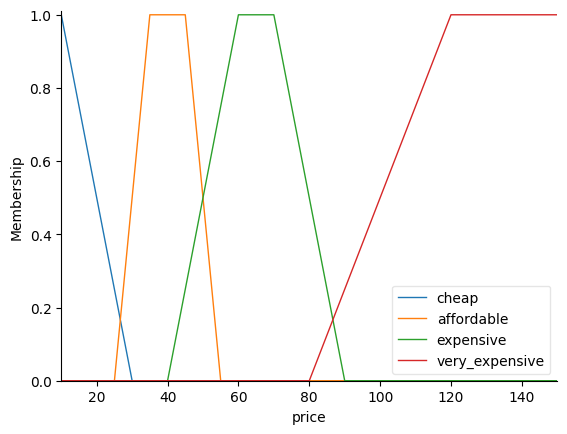

In [79]:
price = ctrl.Antecedent(np.arange(10, 151, 1), 'price')

price['cheap'] = fuzz.trimf(price.universe, [10, 10, 30])
price['affordable'] = fuzz.trapmf(price.universe, [25, 35, 45, 55])
price['expensive'] = fuzz.trapmf(price.universe, [40, 60, 70, 90])
price['very_expensive'] = fuzz.trapmf(price.universe, [80, 120, 150, 150])

price.view()


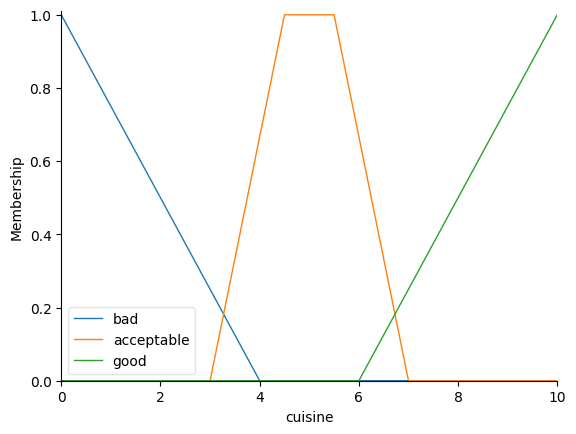

In [80]:
cuisine = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'cuisine')

cuisine['bad'] = fuzz.trimf(cuisine.universe, [0, 0, 4])
cuisine['acceptable'] = fuzz.trapmf(cuisine.universe, [3, 4.5, 5.5, 7])
cuisine['good'] = fuzz.trimf(cuisine.universe, [6, 10, 10])

cuisine.view()


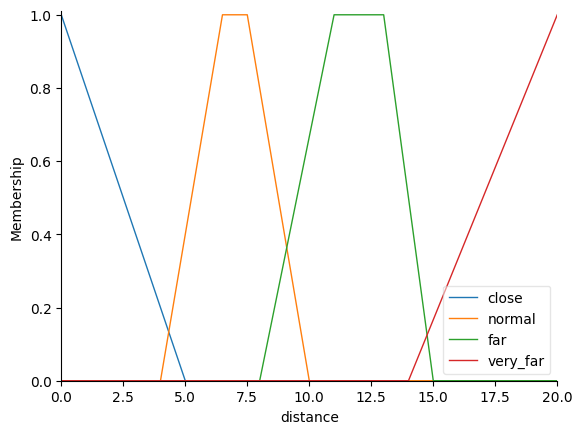

In [81]:
distance = ctrl.Antecedent(np.arange(0, 20.5, 0.5), 'distance')

distance['close'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['normal'] = fuzz.trapmf(distance.universe, [4, 6.5, 7.5, 10])
distance['far'] = fuzz.trapmf(distance.universe, [8, 11, 13, 15])
distance['very_far'] = fuzz.trimf(distance.universe, [14, 20, 20])

distance.view()


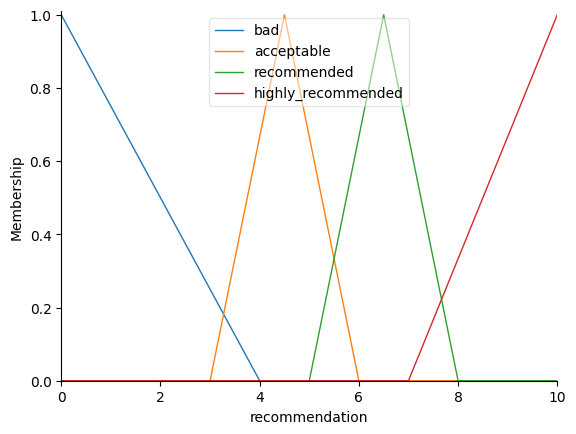

In [82]:
recommendation = ctrl.Consequent(np.arange(0, 10.5, 0.5), 'recommendation')

recommendation['bad'] = fuzz.trimf(recommendation.universe, [0, 0, 4])
recommendation['acceptable'] = fuzz.trimf(recommendation.universe, [3, 4.5, 6])
recommendation['recommended'] = fuzz.trimf(recommendation.universe, [5, 6.5, 8])
recommendation['highly_recommended'] = fuzz.trimf(recommendation.universe, [7, 10, 10])

recommendation.view()


In [83]:
import pandas as pd
import itertools
import os.path

prices = ['cheap','affordable','expensive','very_expensive'] 
cuisines = ['bad','acceptable','good']
distances = ['close','normal','far','very_far']
recommendations = ['bad','acceptable','recommended','highly_recommended']

filename = 'csv_files/recommendations.csv'

if os.path.isfile(filename):
    df = pd.read_csv(filename)
else:
    df = pd.DataFrame(list(itertools.product(prices, cuisines, distances)), columns=['Price','Cuisine','Distance'])
df['Combination'] = df['Price'] + ' price, ' + df['Cuisine'] + ' cuisine, ' + df['Distance'] + ' distance'
df.shape

(64, 4)

In [84]:
df.to_csv(filename,index=False)

In [85]:
df.shape

(64, 4)

In [86]:
prices = ['cheap', 'affordable', 'expensive', 'very_expensive']
cuisines = ['bad', 'acceptable', 'good']
distances = ['close', 'normal', 'far', 'very_far']
recommendations = ['bad', 'acceptable', 'recommended', 'highly_recommended']


In [87]:
recommendation_ctrl = ctrl.ControlSystem([

    ctrl.Rule(
        cuisine['bad'] | price['very_expensive'] |
        (((price['affordable'] & (distance['far']|distance['very_far']) )| price['expensive']) & ~cuisine['good']),
        recommendation['bad']
    ),

    ctrl.Rule(
        (cuisine['acceptable'] &
         ((price['cheap'] & ~distance['close']) |
          (price['affordable'] & (distance['close'] | distance['normal'])))) |
        cuisine['good'] & distance['normal'] & price['expensive'],
        recommendation['acceptable']

    ),
    ctrl.Rule(
        (price['cheap'] & cuisine['acceptable'] & distance['close']) |
        (~price['very_expensive'] & cuisine['good']
         & (distance['close'] | distance['normal'])),
        recommendation['recommended']
    ),

    ctrl.Rule(
        price['cheap'] &
        cuisine['good'], recommendation['highly_recommended']
    ),

])

In [88]:
recommender = ctrl.ControlSystemSimulation(recommendation_ctrl)

In [89]:
def show_recommendation(c, p, d, draw=False):
    print(f"{p=},{c=},{d=}")
    recommender.input['cuisine'] = c
    recommender.input['price'] = p
    recommender.input['distance'] = d

    recommender.compute()
    print(recommender.output['recommendation'])
    if draw:
        recommendation.view(sim=recommender)

In [90]:
restaurants = pd.read_csv('csv_files/restaurants.csv')

my_restaurants = restaurants.iloc[0:3]
my_restaurants


,name,price,cuisine,lat,lon
0,Dream bite,50,Syria,33.491739,36.298381
1,Dajajati,60,China,33.548568,36.313384


In [91]:
# for _, res in my_restaurants.iterrows():
#     print(res['cuisine'])
#     show_recommendation(res['cuisine'], res['price'], res['distance'])


In [92]:
prices = {10, 10, 30,25, 35, 45, 55,40, 60, 70, 90,80, 120, 150, 149}
cuisines = {0, 0, 4,3, 4.5, 5.5, 7,6, 9, }
distances = {0, 5,4, 6.5, 7.5, 10,8, 11, 13, 15,14, 20, 19}
recommendations = ['bad','acceptable','recommended','highly_recommended']
all = list(itertools.product(cuisines, prices, distances))
for c,p,d in all:
     show_recommendation(c,p,d) 

p=35,c=0,d=0
1.3333333333333335
p=35,c=0,d=4
1.3333333333333335
p=35,c=0,d=5
1.3333333333333335
p=35,c=0,d=6.5
1.3333333333333335
p=35,c=0,d=7.5
1.3333333333333335
p=35,c=0,d=8
1.3333333333333335
p=35,c=0,d=10
1.3333333333333335
p=35,c=0,d=11
1.3333333333333335
p=35,c=0,d=13
1.3333333333333335
p=35,c=0,d=14
1.3333333333333335
p=35,c=0,d=15
1.3333333333333335
p=35,c=0,d=19
1.3333333333333335
p=35,c=0,d=20
1.3333333333333335
p=70,c=0,d=0
1.3333333333333335
p=70,c=0,d=4
1.3333333333333335
p=70,c=0,d=5
1.3333333333333335
p=70,c=0,d=6.5
1.3333333333333335
p=70,c=0,d=7.5
1.3333333333333335
p=70,c=0,d=8
1.3333333333333335
p=70,c=0,d=10
1.3333333333333335
p=70,c=0,d=11
1.3333333333333335
p=70,c=0,d=13
1.3333333333333335
p=70,c=0,d=14
1.3333333333333335
p=70,c=0,d=15
1.3333333333333335
p=70,c=0,d=19
1.3333333333333335
p=70,c=0,d=20
1.3333333333333335
p=40,c=0,d=0
1.3333333333333335
p=40,c=0,d=4
1.3333333333333335
p=40,c=0,d=5
1.3333333333333335
p=40,c=0,d=6.5
1.3333333333333335
p=40,c=0,d=7.5
1

1.761904761904762
p=35,c=3,d=10
1.4444444444444446
p=35,c=3,d=11
1.3333333333333335
p=35,c=3,d=13
1.3333333333333335
p=35,c=3,d=14
1.555555555555556
p=35,c=3,d=15
1.761904761904762
p=35,c=3,d=19
1.3650793650793651
p=35,c=3,d=20
1.3333333333333335
p=70,c=3,d=0
1.3333333333333335
p=70,c=3,d=4
1.3333333333333335
p=70,c=3,d=5
1.3333333333333335
p=70,c=3,d=6.5
1.3333333333333335
p=70,c=3,d=7.5
1.3333333333333335
p=70,c=3,d=8
1.3333333333333335
p=70,c=3,d=10
1.3333333333333335
p=70,c=3,d=11
1.3333333333333335
p=70,c=3,d=13
1.3333333333333335
p=70,c=3,d=14
1.3333333333333335
p=70,c=3,d=15
1.3333333333333335
p=70,c=3,d=19
1.3333333333333335
p=70,c=3,d=20
1.3333333333333335
p=40,c=3,d=0
1.761904761904762
p=40,c=3,d=4
1.761904761904762
p=40,c=3,d=5
1.761904761904762
p=40,c=3,d=6.5
1.761904761904762
p=40,c=3,d=7.5
1.761904761904762
p=40,c=3,d=8
1.761904761904762
p=40,c=3,d=10
1.4444444444444446
p=40,c=3,d=11
1.3333333333333335
p=40,c=3,d=13
1.3333333333333335
p=40,c=3,d=14
1.555555555555556
p=40,

p=30,c=8,d=1
6.5
p=30,c=8,d=4
6.500000000000001
p=30,c=8,d=6
6.5
p=30,c=8,d=8
6.5


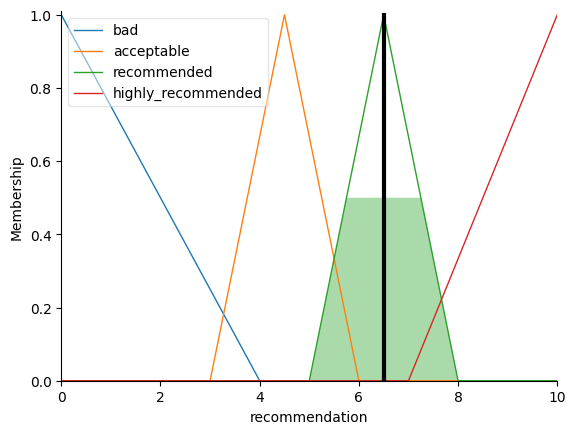

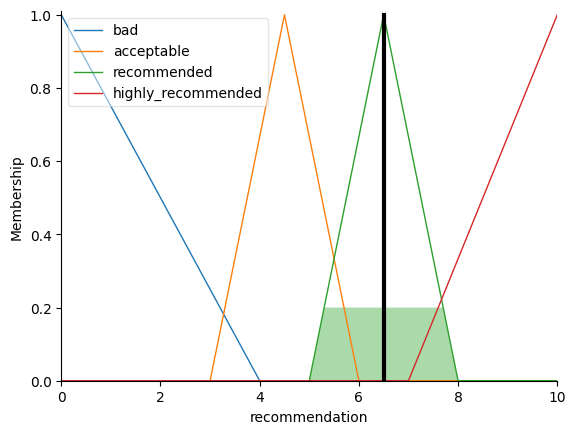

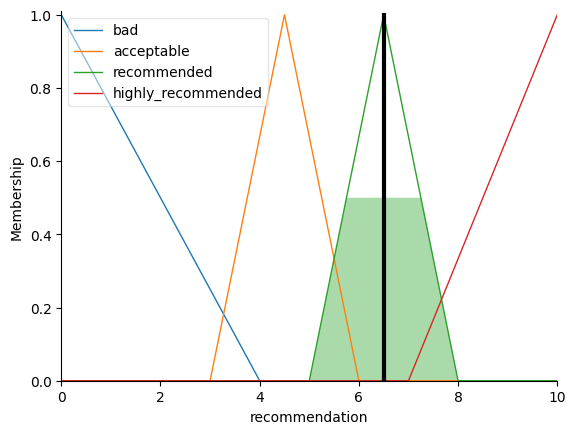

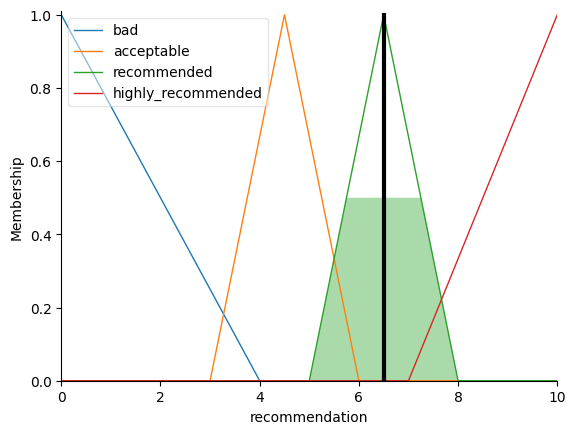

In [97]:
show_recommendation(p=30,c=8,d=1,draw=True)
show_recommendation(p=30,c=8,d=4,draw=True)
show_recommendation(p=30,c=8,d=6,draw=True)
show_recommendation(p=30,c=8,d=8,draw=True)